- reference : http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/

# Frequentism vs. Bayesianism: a Philosophical Debate

근본적으로, frequentist 와 Bayesian은 확률에 정의에 대해서 발생하는 다른 관점을 가지고 있습니다.

빈도주의자의 경우에 확률은 반복되는 한정된 measurements에 대해서 의미를 가지게 됩니다. 빈도주의자들에게 확률은 기본적으로 사건이 발생한 횟수와 연관을 가지게 됩니다. 하지만 베이지안의 경우에는 확률은 사건과 관련된 우리의 자신의 지식과 연관되어 있습니다. 즉 우리는 어떠한 범위에 있을 확률에 대해서 의미있게 말할 수 있습니다. 본 포스팅에서는 Simple Photon Counts라는 예시를 통해서 두 관점을 비교해 보고자 합니다.

## Case Study: Simple Photon Counts

만원경을 통해서 하늘에 있는 하나의 별에 대한 빛을 관찰해 본다고 가정해 봅시다. 당분간 우리는 별의 실제 Flux가 시간에 따라 일정하다고 생각할 것입니다. 실제 $F_true$가 존재한다고 가정해봅시다. 우리가 $N$번 만원경을 통해서 특정한다고 가정할때, 우리는 $i^{th}$ 번째의 특정에서의 빛의량과 에러값을 가지게 될 것입니다.

여기서 질문은 우리의 측정된 관측값 $D=\{F_{i},e_{i}\}$가 주어졌을때, 실제 $F_{true}$를 모델링 할수 있는 것이냐 입니다. 

In [3]:
import numpy as np
from scipy import stats

np.random.seed(1)
F_true = 1000 # true flux값, 각 Sample은 1초마다 측정된다
N = 50 # 측정 갯수
F = stats.poisson(F_true).rvs(N) # N 번 측정한 광량
e = np.sqrt(F) # 예측되는 에러

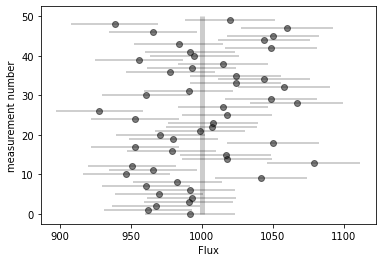

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.2)
ax.set_xlabel("Flux");ax.set_ylabel("measurement number");

이 측정값에서 우리는 error를 Poisson statics를 활용하고 또한 root를 취해서 모델링 했다. 이 예제에서 우리는 $F_{true}$를 안다고 가정하고 있지만, 과연 우리가 measurement가 존재할때 실제 $F_{true}$를 예측할 수 있을까? 이를 Frequentist와 Bayesian의 관점으로 나눠서 생각해보자

## Frequentist Approach to Simple Photon Counts

Frequentist는 maximum likelihood approach를 사용합니다. 주어진 instance $D_{i} = (F_{i},e_{i})가 있을때 우리는 가정된 Gaussian error아래서 확률 분포를 모델링 할 수 있습니다. 

$$
P(D_i~|~F_{\rm true}) = \frac{1}{\sqrt{2\pi e_i^2}} \exp{\left[\frac{-(F_i - F_{\rm true})^2}{2 e_i^2}\right]}
$$

위 식은 주어진 $F_{true}$에서의 $D_{i}$의 확률은 이라고 읽어야 합니다. 여기서 우리는 $F_{true}$의 평균과 편차를 사용한 것을 볼 수 있습니다.

우리는 각 데이터 포인트에 대한 확률들의 곱을 통해서 likelihood function을 만들 수 있습니다.

$$
\mathcal{L}(D~|~F_{\rm true}) = \prod_{i=1}^N P(D_i~|~F_{\rm true})
$$

여기서 $D={D_i}$가 전체 measurements의 set으로 표현된다고 해봅시다. likelihood function이 매우 작아질 수 있기 때문에, 우리는 계산의 편의를 위해서 log-likelihood를 사용하도록 합니다. log 로 인하여 위 두가지 equation은 다음과 같이 표현이 가능합니다.

$$
\log\mathcal{L} = -\frac{1}{2} \sum_{i=1}^N \left[ \log(2\pi  e_i^2) + \frac{(F_i - F_{\rm true})^2}{e_i^2} \right]$$

우리는 위 likelihood가 maximize되는 $F_{true}$를 찾게 됩니다. 간단한 문제의 경우에는 $d\log\mathcal{L}/dF_{\rm true} = 0$ 를 통해서 찾을 수 있게 됩니다.
위 미분의 결과로 나오게 되는 $F_{true}$는 다음과 같습니다.

$$
F_{\rm est} = \frac{\sum w_i F_i}{\sum w_i};~~w_i = 1/e_i^2
$$

여기서 우리는 에러가 동일하다고 가정하기 때문에 제거 할 수 있습니다. 따라서 기댓값은 다음과 같이 모델링 됩니다.

$$
F_{\rm est} = \frac{1}{N}\sum_{i=1}^N F_i
$$

우리의 직관을 믿는다면 $F_est$는 관측값의 평균으로 모델링됩니다. 에러에 강한 가정이 있는 경우에 말이죠. 

In [5]:
w = 1. / e ** 2
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, (w * F).sum() / w.sum(), w.sum() ** -0.5, N))


      F_true = 1000
      F_est  = 998 +/- 4 (based on 50 measurements)
      
